#Lab 5: Insurance Costs
# Instructions
You will submit an HTML document to Canvas as your final version.

Your document should show your code chunks/cells as well as any output. Make sure that only relevant output is printed. Do not, for example, print the entire dataset in your final knitted file.

Your document should also be clearly organized, so that it is easy for a reader to find your answers to each question.

There may be a small penalty for submissions that are difficult to read or navigate.

# Part One: Data Exploration
The dataset we will study for this assignment contains information about health insurance costs for individuals with no dependents (children) in the United States. The information contained in the data is:

Age of primary beneficiary

Gender of primary beneficiary (only female, male recorded)

Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

Whether the beneficiary smokes

The beneficiary’s residential area in the US, northeast, southeast, southwest, northwest.

Individual medical costs billed by health insurance

You can find this data at: https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1

1. Read in the dataset, and display some summaries of the data.

2. Fix any concerns you have about the data.

3. Make up to three plots comparing the response variable (charges) to one of the predictor variables. Briefly discuss each plot.

In [2]:
import pandas as pd
from plotnine import *

# Load the dataset
file_path = 'insurance_costs_1.csv'
data = pd.read_csv(file_path)

# Check for missing values
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)

# Check for inconsistencies in categorical columns
print("Unique values in 'sex':", data['sex'].unique())
print("Unique values in 'smoker':", data['smoker'].unique())
print("Unique values in 'region':", data['region'].unique())

# Replace any inconsistent values (assuming some common issues)
data['sex'] = data['sex'].str.strip().str.lower()
data['smoker'] = data['smoker'].str.strip().str.lower()
data['region'] = data['region'].str.strip().str.lower()



Missing values per column:
 age        0
sex        0
bmi        0
smoker     0
region     0
charges    0
dtype: int64
Unique values in 'sex': ['female' 'male']
Unique values in 'smoker': ['yes' 'no']
Unique values in 'region': ['southwest' 'northwest' 'southeast' 'northeast']


## Plot 1: Charges vs Age by Smoking Status
This scatter plot visualizes the increase in charges with age and shows that smokers generally incur higher charges than non-smokers.

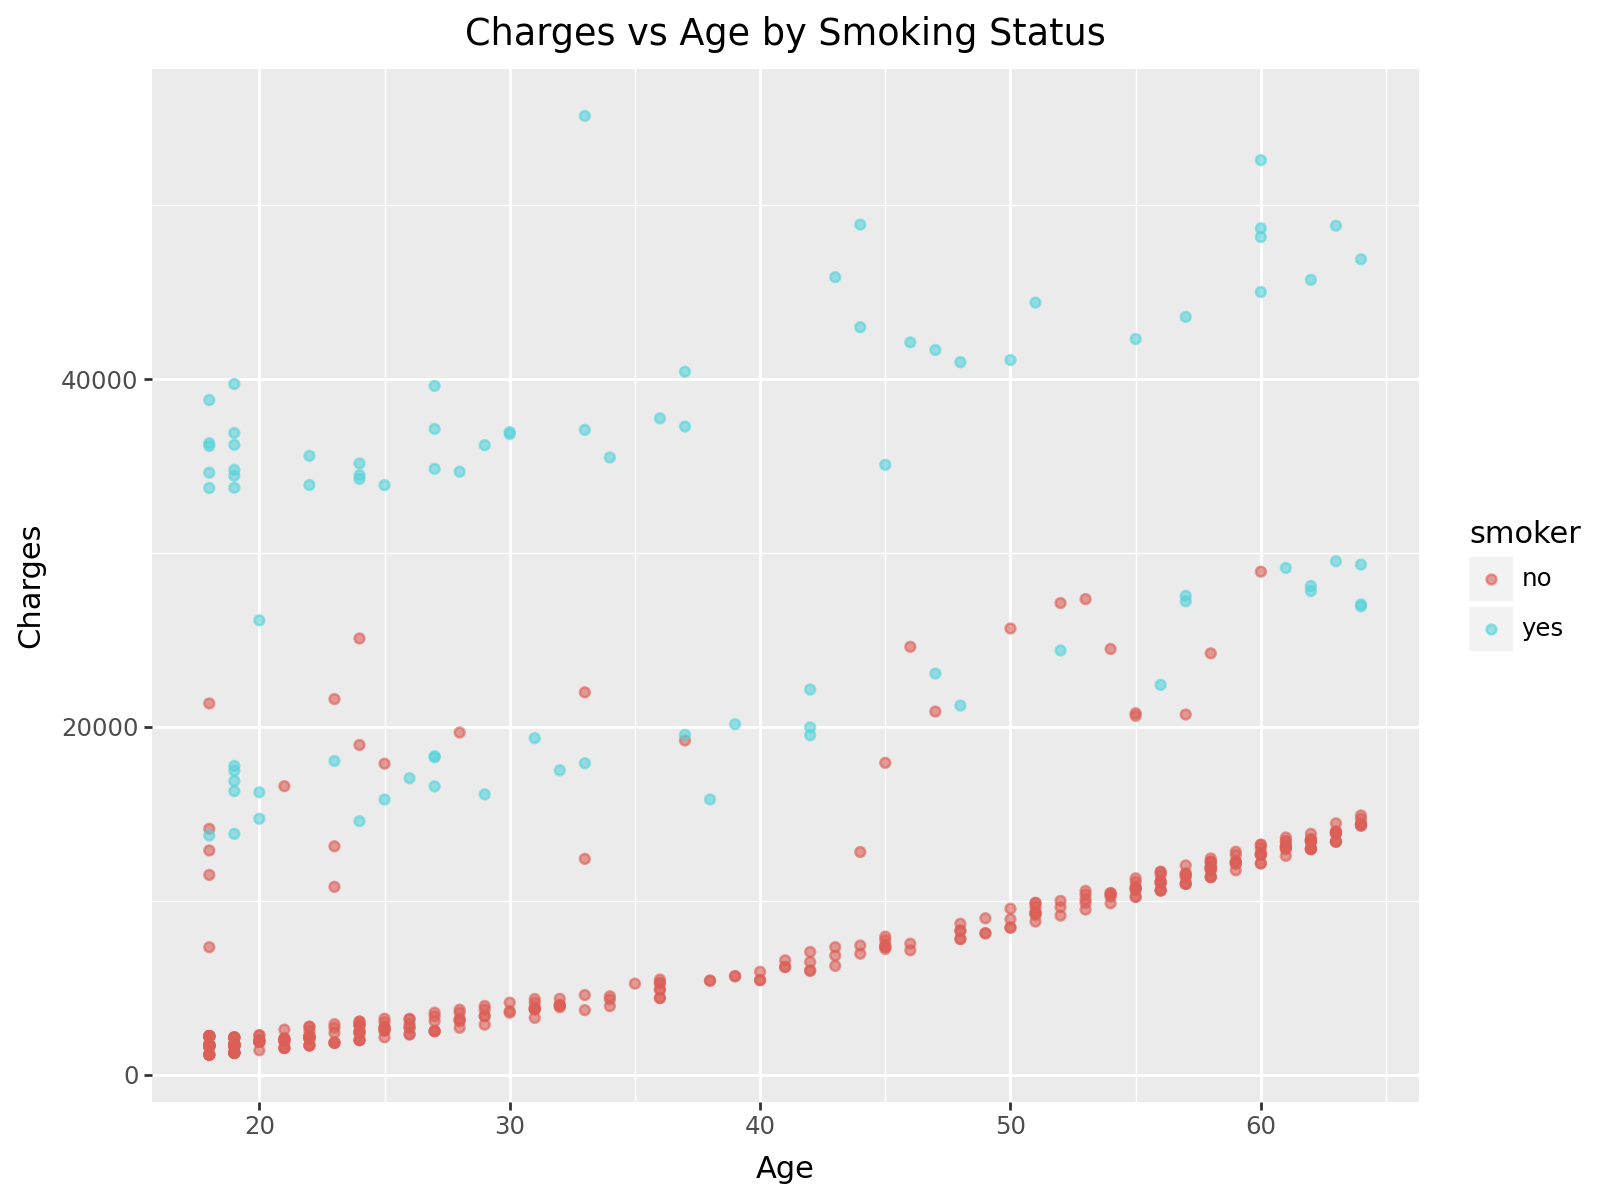

In [3]:

plot1 = (
    ggplot(data, aes(x='age', y='charges', color='smoker'))
    + geom_point(alpha=0.6)
    + labs(title='Charges vs Age by Smoking Status', x='Age', y='Charges')
    + theme(figure_size=(8, 6))
)
plot1


## Plot 2: Charges vs BMI by Smoking Status
Here, we observe a similar trend, where higher BMI often correlates with higher charges, especially among smokers.

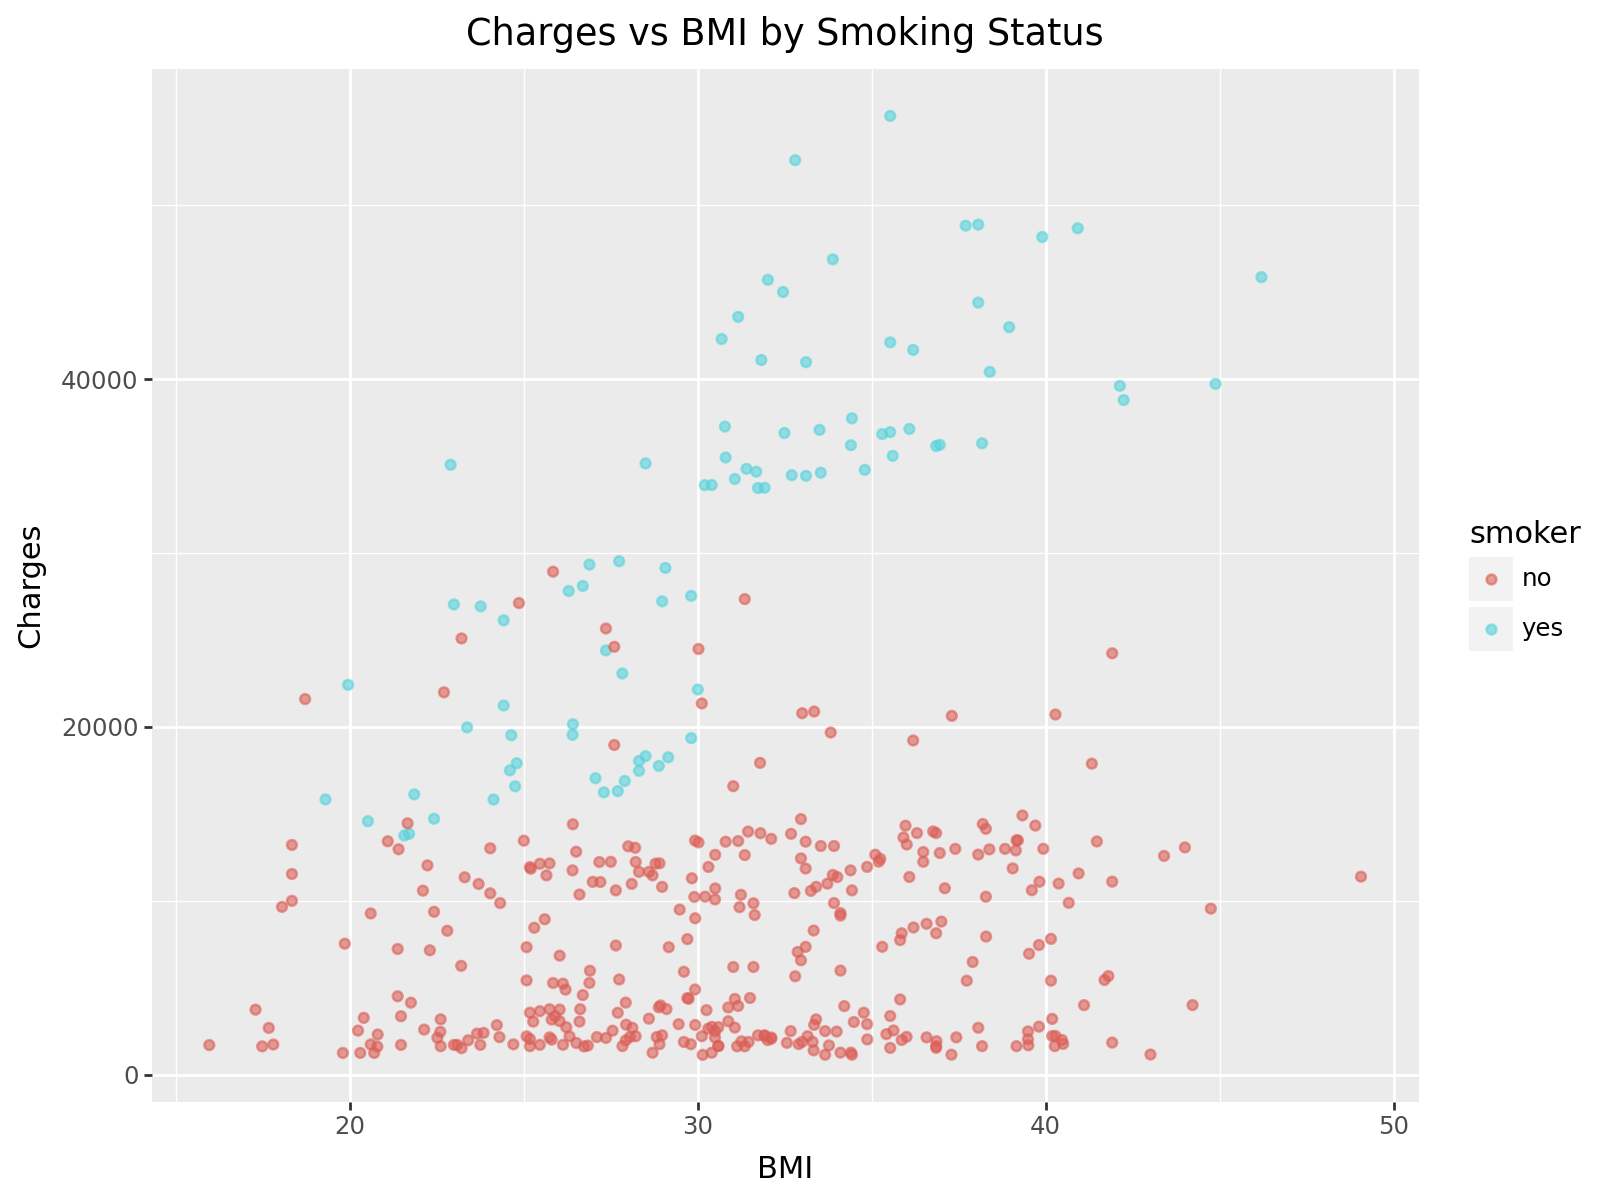

In [4]:

plot2 = (
    ggplot(data, aes(x='bmi', y='charges', color='smoker'))
    + geom_point(alpha=0.6)
    + labs(title='Charges vs BMI by Smoking Status', x='BMI', y='Charges')
    + theme(figure_size=(8, 6))
)
plot2


## Plot 3: Charges by Region and Smoking Status
This boxplot reveals regional variations in insurance charges, with smokers consistently facing higher charges across all regions.

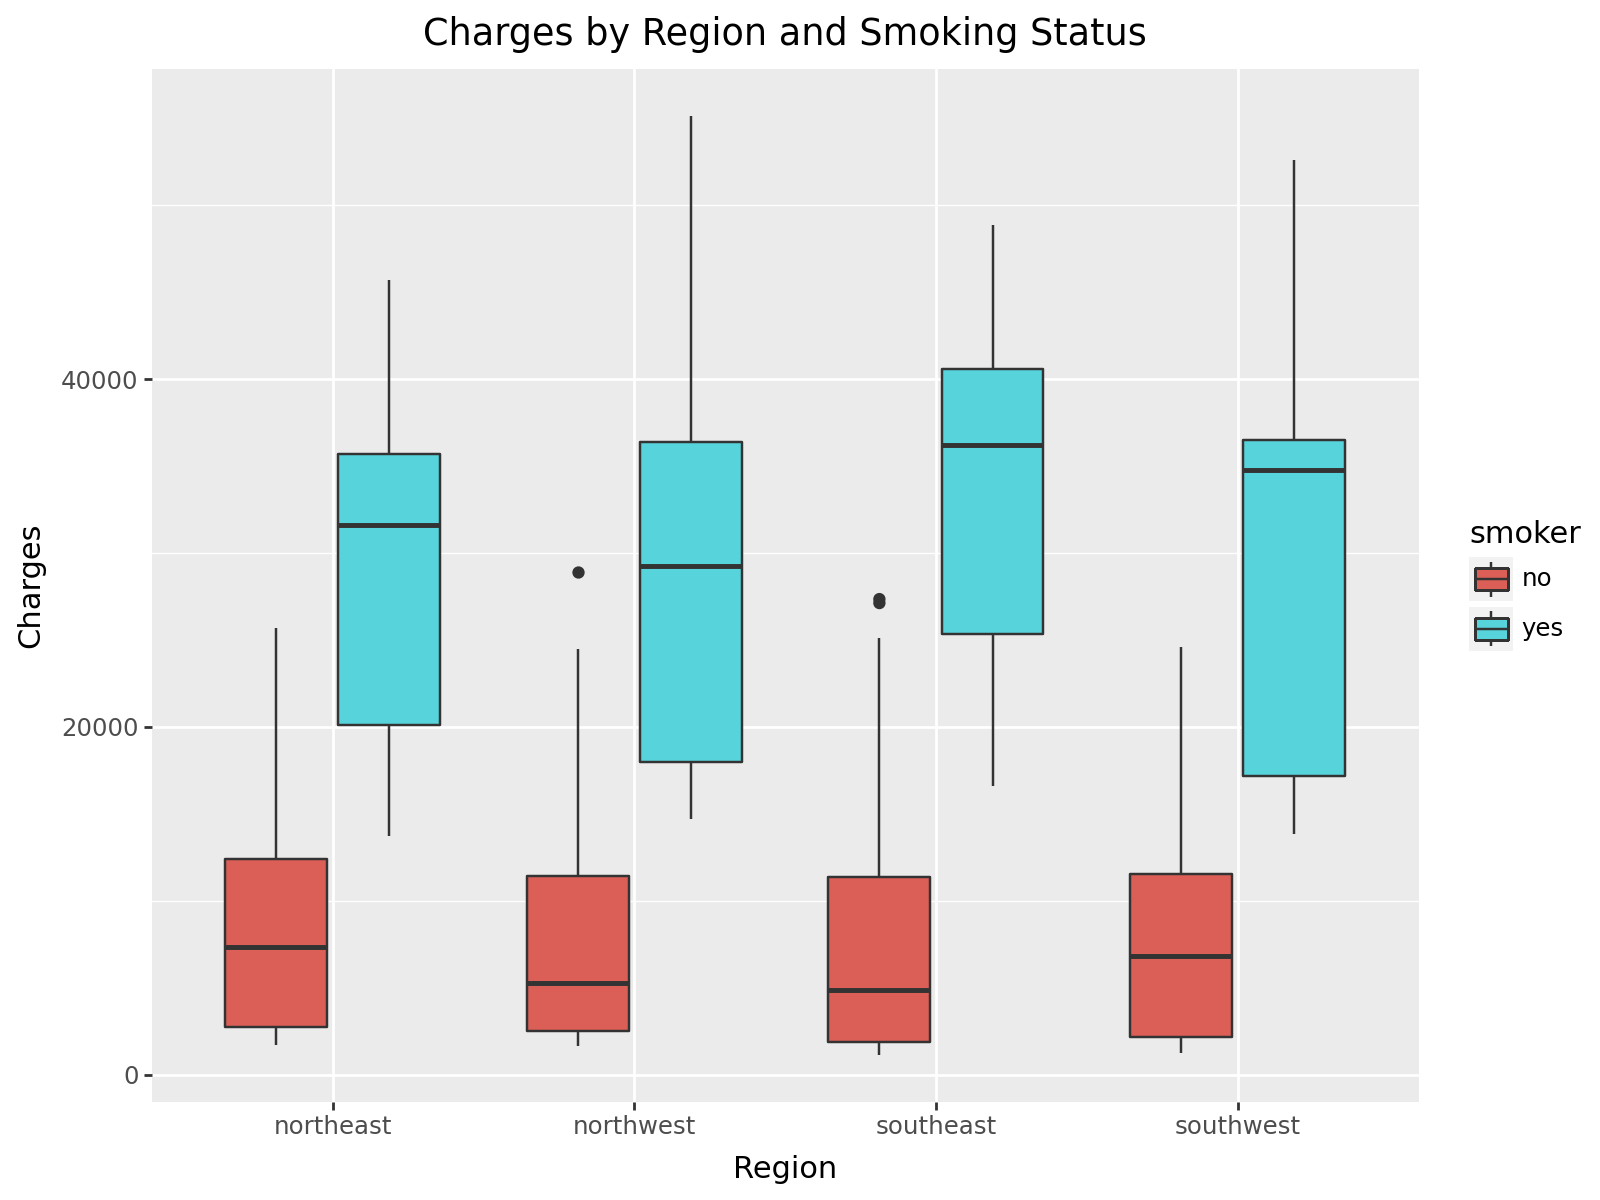

In [5]:

plot3 = (
    ggplot(data, aes(x='region', y='charges', fill='smoker'))
    + geom_boxplot()
    + labs(title='Charges by Region and Smoking Status', x='Region', y='Charges')
    + theme(figure_size=(8, 6))
)
plot3


# Part Two: Simple Linear Models
1. Construct a simple linear model to predict the insurance charges from the beneficiary’s age. Discuss the model fit, and interpret the coefficient estimates.

### Interpretation of Model Results

R-squared: This score indicates the proportion of variance in charges explained by age. Higher r-squared suggests a better model fit, but as a single predictor model, it may be low if other variables (like BMI or smoking status) significantly impact charges.

RMSE: This metric tells us the average error in predictions; lower RMSE values mean more accurate predictions.

Intercept: The intercept represents the predicted charges when age is zero. Although it may not have a practical interpretation in this context (since age can’t realistically be zero), it’s part of the model equation.

Age Coefficient: The age coefficient shows the estimated change in insurance charges for each additional year of age. It indicates that, on average, insurance charges increase by $228.80 per year of age. A significant age coefficient means that age is an important predictor of insurance charges.

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define predictor (age) and response (charges)
X = data[['age']]  # Predictor variable needs to be in 2D array format for sklearn
y = data['charges']

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict charges based on age
y_pred = model.predict(X)

# Calculate R-squared and RMSE
r_squared = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Display results
print("R-squared:", r_squared)
print("Root Mean Squared Error (RMSE):", rmse)
print("Intercept:", model.intercept_)
print("Age Coefficient:", model.coef_[0])


R-squared: 0.09938105452062707
Root Mean Squared Error (RMSE): 11257.85361026976
Intercept: 3611.758798507106
Age Coefficient: 228.79904937243666


2. Make a model that also incorporates the variable sex. Report your results.

In [7]:
# Convert 'sex' to dummy variables
data_encoded = pd.get_dummies(data, columns=['sex'], drop_first=True)  # Creates 'sex_male' column, with 'female' as reference

# Define predictors (age and sex) and response (charges)
X = data_encoded[['age', 'sex_male']]
y = data_encoded['charges']

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict charges using the model
y_pred = model.predict(X)

# Calculate R-squared and RMSE
r_squared = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Display results
print("R-squared:", r_squared)
print("Root Mean Squared Error (RMSE):", rmse)
print("Intercept:", model.intercept_)
print("Age Coefficient:", model.coef_[0])
print("Sex (Male) Coefficient:", model.coef_[1])


R-squared: 0.10012952499706396
Root Mean Squared Error (RMSE): 11253.174648932223
Intercept: 3315.3323465342655
Age Coefficient: 228.4258623585593
Sex (Male) Coefficient: 649.8325899725361




3. Now make a model that does not include sex, but does include smoker. Report your results.

In [8]:
# Convert 'smoker' to dummy variables
data_encoded = pd.get_dummies(data, columns=['smoker'], drop_first=True)  # Creates 'smoker_yes' column, with 'no' as reference

# Define predictors (age and smoker) and response (charges)
X = data_encoded[['age', 'smoker_yes']]
y = data_encoded['charges']

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict charges using the model
y_pred = model.predict(X)

# Calculate R-squared and RMSE
r_squared = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Display results
print("R-squared:", r_squared)
print("Root Mean Squared Error (RMSE):", rmse)
print("Intercept:", model.intercept_)
print("Age Coefficient:", model.coef_[0])
print("Smoker (Yes) Coefficient:", model.coef_[1])


R-squared: 0.7603842948069404
Root Mean Squared Error (RMSE): 5806.8779447517
Intercept: -2166.852295375431
Age Coefficient: 253.14535548828445
Smoker (Yes) Coefficient: 24048.86743795388




4. Which model (Q2 or Q3) do you think better fits the data? Justify your answer by calculating the MSE for each model, and also by comparing R-squared values.

The model in Q3 better fits the data. It has a higher R-squared (.76 vs .1) and a lower MSE (5806 vs 11253), which proves that it has a better fit.

# Part Three: Multiple Linear Models
Now let’s consider including multiple quantitative predictors.

1. Fit a model that uses age and bmi as predictors. (Do not include an interaction term, age*bmi, between these two.) Report your results. How does the MSE compare to the model in Part Two Q1? How does the R-squared compare?

This new model has a slightly higher r-squared and slightly lower MSE, meaning that this model is a slightly better fit.

In [9]:
# Define predictors (age and bmi) and response (charges)
X = data[['age', 'bmi']]
y = data['charges']

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict charges using the model
y_pred = model.predict(X)

# Calculate R-squared and RMSE
r_squared = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Display results
print("R-squared:", r_squared)
print("Root Mean Squared Error (RMSE):", rmse)
print("Intercept:", model.intercept_)
print("Age Coefficient:", model.coef_[0])
print("BMI Coefficient:", model.coef_[1])

R-squared: 0.12032144234129338
Root Mean Squared Error (RMSE): 11126.205084452247
Intercept: -4627.533445708479
Age Coefficient: 216.29721472342518
BMI Coefficient: 283.20380125540294



2. Perhaps the relationships are not linear. Fit a model that uses age and age^2 as predictors. How do the MSE and R-squared compare to the model in P2 Q1?

This one has values very close to the r-squared and MSE in P2 Q1. The differences seem pretty intangible.

In [10]:
# Calculate age squared
data['age_squared'] = data['age'] ** 2

# Define predictors (age and age_squared) and response (charges)
X = data[['age', 'age_squared']]
y = data['charges']

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict charges using the model
y_pred = model.predict(X)

# Calculate R-squared and RMSE
r_squared = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Display results
print("R-squared:", r_squared)
print("Root Mean Squared Error (RMSE):", rmse)
print("Intercept:", model.intercept_)
print("Age Coefficient:", model.coef_[0])
print("Age Squared Coefficient:", model.coef_[1])


R-squared: 0.09958694669946933
Root Mean Squared Error (RMSE): 11256.5666972469
Intercept: 2299.730568726698
Age Coefficient: 308.42816984249174
Age Squared Coefficient: -1.0015088934040028


3. Fit a polynomial model of degree 4. How do the MSE and R-squared compare to the model in P2 Q1?

It has slightly better r-squared and lower MSE, making it a better fit by a small margin.

In [11]:
from sklearn.preprocessing import PolynomialFeatures

# Define the predictor (age) and response (charges)
X = data[['age']]
y = data['charges']

# Create polynomial features of degree 4
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_poly, y)

# Predict charges using the polynomial model
y_pred = model.predict(X_poly)

# Calculate R-squared and RMSE
r_squared = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Display results
print("R-squared:", r_squared)
print("Root Mean Squared Error (RMSE):", rmse)
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


R-squared: 0.1078293145318373
Root Mean Squared Error (RMSE): 11204.927025451721
Intercept: 68637.89782225997
Coefficients: [ 0.00000000e+00 -7.94841022e+03  3.58110163e+02 -6.47905090e+00
  4.12933982e-02]



4. Fit a polynomial model of degree 12. How do the MSE and R-squared compare to the model in P2 Q1?

Similarly to the last one, it has slightly higher r-squared and lower MSE.

In [12]:
# Define the predictor (age) and response (charges)
X = data[['age']]
y = data['charges']

# Create polynomial features of degree 12
poly = PolynomialFeatures(degree=12)
X_poly = poly.fit_transform(X)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_poly, y)

# Predict charges using the polynomial model
y_pred = model.predict(X_poly)

# Calculate R-squared and RMSE
r_squared = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Display results
print("R-squared:", r_squared)
print("Root Mean Squared Error (RMSE):", rmse)
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


R-squared: 0.10764575278101796
Root Mean Squared Error (RMSE): 11206.079658166456
Intercept: 6680.406607144585
Coefficients: [ 0.00000000e+00 -2.75109853e-06  4.41737781e-08  1.77424546e-07
  2.93735683e-06  3.50504162e-05  2.34113904e-04 -2.59469469e-05
  1.22734908e-06 -3.11554805e-08  4.41950559e-10 -3.29697452e-12
  1.00632660e-14]


5. According to the MSE and R-squared, which is the best model? Do you agree that this is indeed the “best” model? Why or why not?

Based on the numbers alone, the best model that we got in part three was in question one.

6. Plot the predictions from your model in Q4 as a line plot on top of the scatterplot of your original data.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names


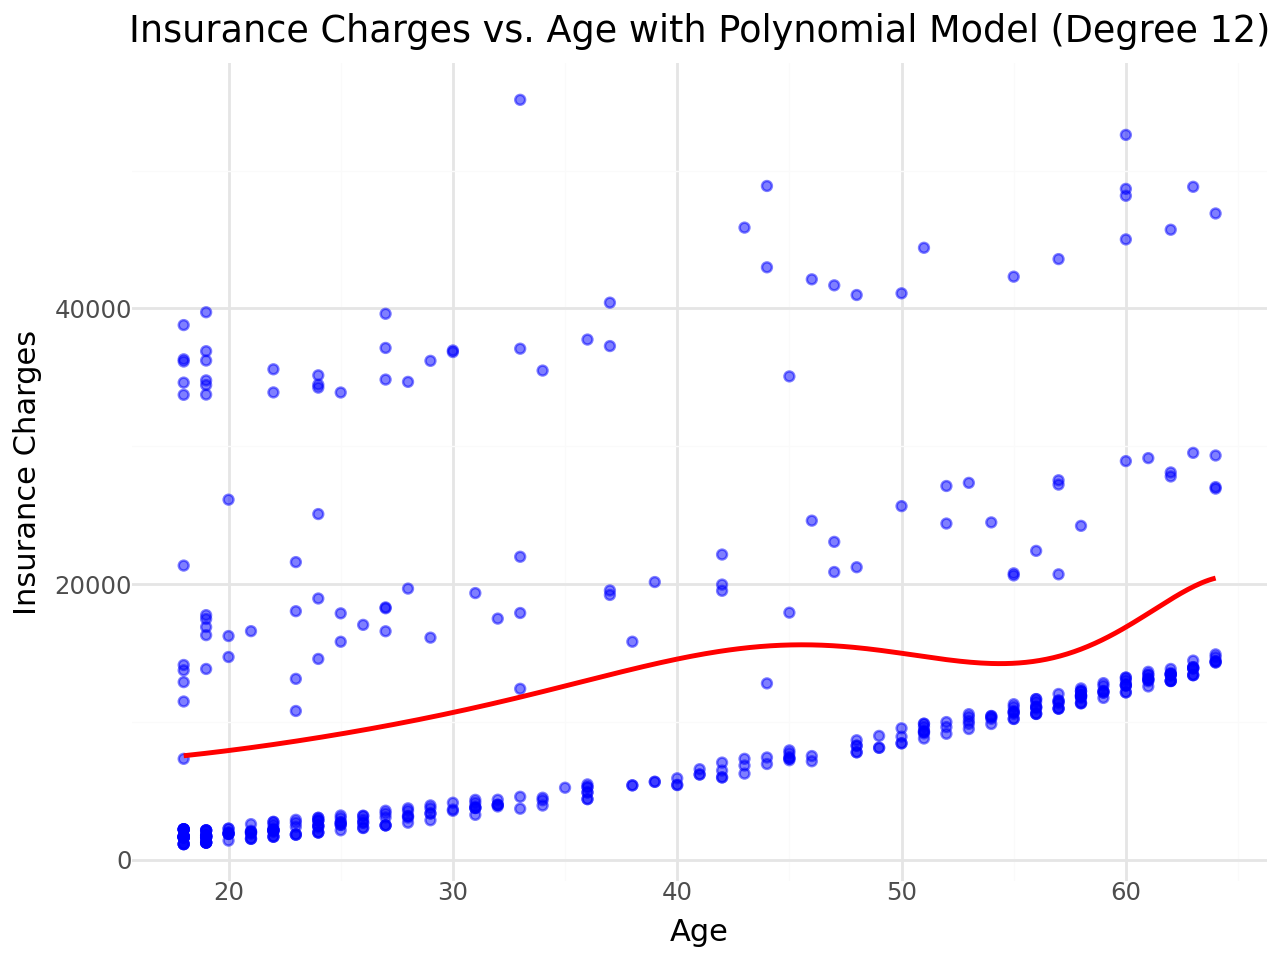

In [13]:
# This is to plot a smooth line, we generate age values from min to max in small increments
age_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
age_range_poly = poly.transform(age_range)
charges_pred = model.predict(age_range_poly)

# Step 3: Prepare a DataFrame for the predictions to use with plotnine
pred_df = pd.DataFrame({'age': age_range.flatten(), 'charges_pred': charges_pred})

# Step 4: Plot the data and the model predictions
plot = (
    ggplot(data, aes(x='age', y='charges')) +
    geom_point(color='blue', alpha=0.5) +  # Scatter plot of original data
    geom_line(pred_df, aes(x='age', y='charges_pred'), color='red', size=1) +  # Line plot of model predictions
    labs(
        title="Insurance Charges vs. Age with Polynomial Model (Degree 12)",
        x="Age",
        y="Insurance Charges"
    ) +
    theme_minimal()
)

# Display the plot
plot





# Part Four: New data

Great news! We’ve managed to collect data about the insurance costs for a few more individuals. You can find the new dataset here: https://www.dropbox.com/s/sky86agc4s8c6qe/insurance_costs_2.csv?dl=1

Consider the following possible models:

Only age as a predictor.

age and bmi as a predictor.

age, bmi, and smoker as predictors (no interaction terms)

age, and bmi, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi):smoker)

age, bmi, and smokeras predictors, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi)*smoker)

For each model, fit the model on the original data.

Then, use the fitted model to predict on the new data.

Report the MSE for each model’s new predictions. Based on this, which is the best model to use?

Make a plot showing the residuals of your final chosen model.



In [19]:
# Reload the data to start fresh
original_data = pd.read_csv("https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1")
new_data = pd.read_csv("https://www.dropbox.com/s/sky86agc4s8c6qe/insurance_costs_2.csv?dl=1")

# Convert 'smoker' to numeric (1 for 'yes', 0 for 'no')
original_data['smoker'] = original_data['smoker'].replace({'yes': 1, 'no': 0})
new_data['smoker'] = new_data['smoker'].replace({'yes': 1, 'no': 0})

# Check for NaN values before proceeding
# print("Original data NaN check:\n", original_data.isna().sum())
# print("New data NaN check:\n", new_data.isna().sum())

# Proceed with the model setup
y = original_data['charges']

X1 = original_data[['age']]
X_new1 = new_data[['age']]

X2 = original_data[['age', 'bmi']]
X_new2 = new_data[['age', 'bmi']]

X3 = original_data[['age', 'bmi', 'smoker']]
X_new3 = new_data[['age', 'bmi', 'smoker']]

original_data['age_smoker'] = original_data['age'] * original_data['smoker']
original_data['bmi_smoker'] = original_data['bmi'] * original_data['smoker']
X4 = original_data[['age', 'bmi', 'age_smoker', 'bmi_smoker']]

new_data['age_smoker'] = new_data['age'] * new_data['smoker']
new_data['bmi_smoker'] = new_data['bmi'] * new_data['smoker']
X_new4 = new_data[['age', 'bmi', 'age_smoker', 'bmi_smoker']]

X5 = original_data[['age', 'bmi', 'smoker', 'age_smoker', 'bmi_smoker']]
X_new5 = new_data[['age', 'bmi', 'smoker', 'age_smoker', 'bmi_smoker']]

# Function to fit the model and predict on new data
def fit_and_predict(X_train, X_test, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

# Calculate MSE for each model
mse_results = {}

# Model 1
y_pred1 = fit_and_predict(X1, X_new1, y)
mse_results['Model 1 (Age only)'] = mean_squared_error(new_data['charges'], y_pred1)

# Model 2
y_pred2 = fit_and_predict(X2, X_new2, y)
mse_results['Model 2 (Age + BMI)'] = mean_squared_error(new_data['charges'], y_pred2)

# Model 3
y_pred3 = fit_and_predict(X3, X_new3, y)
mse_results['Model 3 (Age + BMI + Smoker)'] = mean_squared_error(new_data['charges'], y_pred3)

# Model 4
y_pred4 = fit_and_predict(X4, X_new4, y)
mse_results['Model 4 ((Age + BMI):Smoker)'] = mean_squared_error(new_data['charges'], y_pred4)

# Model 5
y_pred5 = fit_and_predict(X5, X_new5, y)
mse_results['Model 5 ((Age + BMI)*Smoker)'] = mean_squared_error(new_data['charges'], y_pred5)

# Display MSE results
print("MSE for each model on the new data:")
for model, mse in mse_results.items():
    print(f"{model}: {mse}")

# Determine the best model
best_model_name = min(mse_results, key=mse_results.get)
print(f"The best model is: {best_model_name}")


MSE for each model on the new data:
Model 1 (Age only): 136077136.50195494
Model 2 (Age + BMI): 132636406.1108129
Model 3 (Age + BMI + Smoker): 35377541.24141632
Model 4 ((Age + BMI):Smoker): 24795908.41264334
Model 5 ((Age + BMI)*Smoker): 21786256.86685252
The best model is: Model 5 ((Age + BMI)*Smoker)


<ipython-input-19-cfb1b2d0b1de>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
<ipython-input-19-cfb1b2d0b1de>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


<ipython-input-21-dc76487c11ab>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


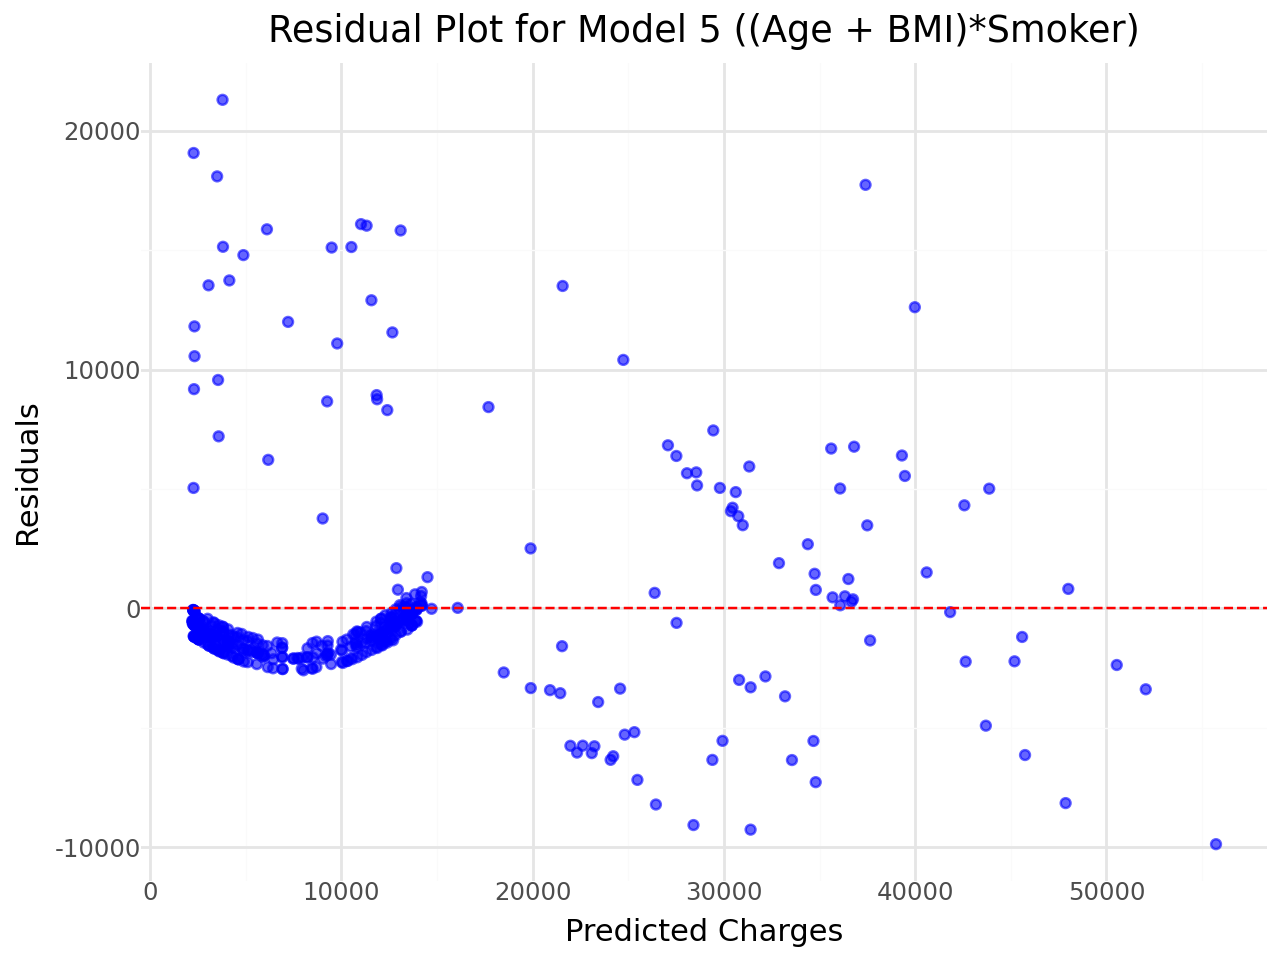

In [21]:

from plotnine import ggplot, aes, geom_point, geom_hline, labs, theme_minimal

# Reload original data
original_data = pd.read_csv("https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1")

# Preprocess data for Model 5 ((Age + BMI)*Smoker)
original_data['smoker'] = original_data['smoker'].replace({'yes': 1, 'no': 0})
original_data['age_smoker'] = original_data['age'] * original_data['smoker']
original_data['bmi_smoker'] = original_data['bmi'] * original_data['smoker']
X = original_data[['age', 'bmi', 'smoker', 'age_smoker', 'bmi_smoker']]
y = original_data['charges']

# Fit Model 5
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)

# Calculate residuals
original_data['predicted_charges'] = predictions
original_data['residuals'] = original_data['charges'] - original_data['predicted_charges']

# Plot residuals
residual_plot = (
    ggplot(original_data, aes(x='predicted_charges', y='residuals')) +
    geom_point(alpha=0.6, color="blue") +
    geom_hline(yintercept=0, color="red", linetype="dashed") +
    labs(
        title="Residual Plot for Model 5 ((Age + BMI)*Smoker)",
        x="Predicted Charges",
        y="Residuals"
    ) +
    theme_minimal()
)

# Display the plot
residual_plot


# Part Five: Full Exploration
Using any variables in this dataset, and any polynomial of those variables, find the model that best predicts on the new data after being fit on the original data.

Make a plot showing the residuals of your final chosen model.

In [22]:

# Load data
original_data = pd.read_csv("https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1")
new_data = pd.read_csv("https://www.dropbox.com/s/sky86agc4s8c6qe/insurance_costs_2.csv?dl=1")

# Preprocess: Convert 'smoker' to numeric
original_data['smoker'] = original_data['smoker'].replace({'yes': 1, 'no': 0})
new_data['smoker'] = new_data['smoker'].replace({'yes': 1, 'no': 0})

# Define target variable
y_train = original_data['charges']
y_test = new_data['charges']

# Define the predictors
best_mse = float("inf")
best_degree = None
best_model = None

# Iterate over polynomial degrees for age and bmi
for degree in range(1, 4):  # Try degrees 1 to 3
    # Generate polynomial features for age and bmi
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(original_data[['age', 'bmi']])
    X_test_poly = poly.transform(new_data[['age', 'bmi']])

    # Add smoker variable and interactions
    X_train = np.hstack([X_train_poly, original_data[['smoker']].values])
    X_test = np.hstack([X_test_poly, new_data[['smoker']].values])

    # Fit the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on the new data
    y_pred = model.predict(X_test)

    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred)
    print(f"Degree: {degree}, MSE: {mse}")

    # Update best model if current one has lower MSE
    if mse < best_mse:
        best_mse = mse
        best_degree = degree
        best_model = model

print(f"\nBest Model: Polynomial degree {best_degree} with MSE {best_mse}")


Degree: 1, MSE: 35377541.24141632
Degree: 2, MSE: 35502778.925719865
Degree: 3, MSE: 36167447.18267154

Best Model: Polynomial degree 1 with MSE 35377541.24141632


<ipython-input-22-eea4d7499331>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
<ipython-input-22-eea4d7499331>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


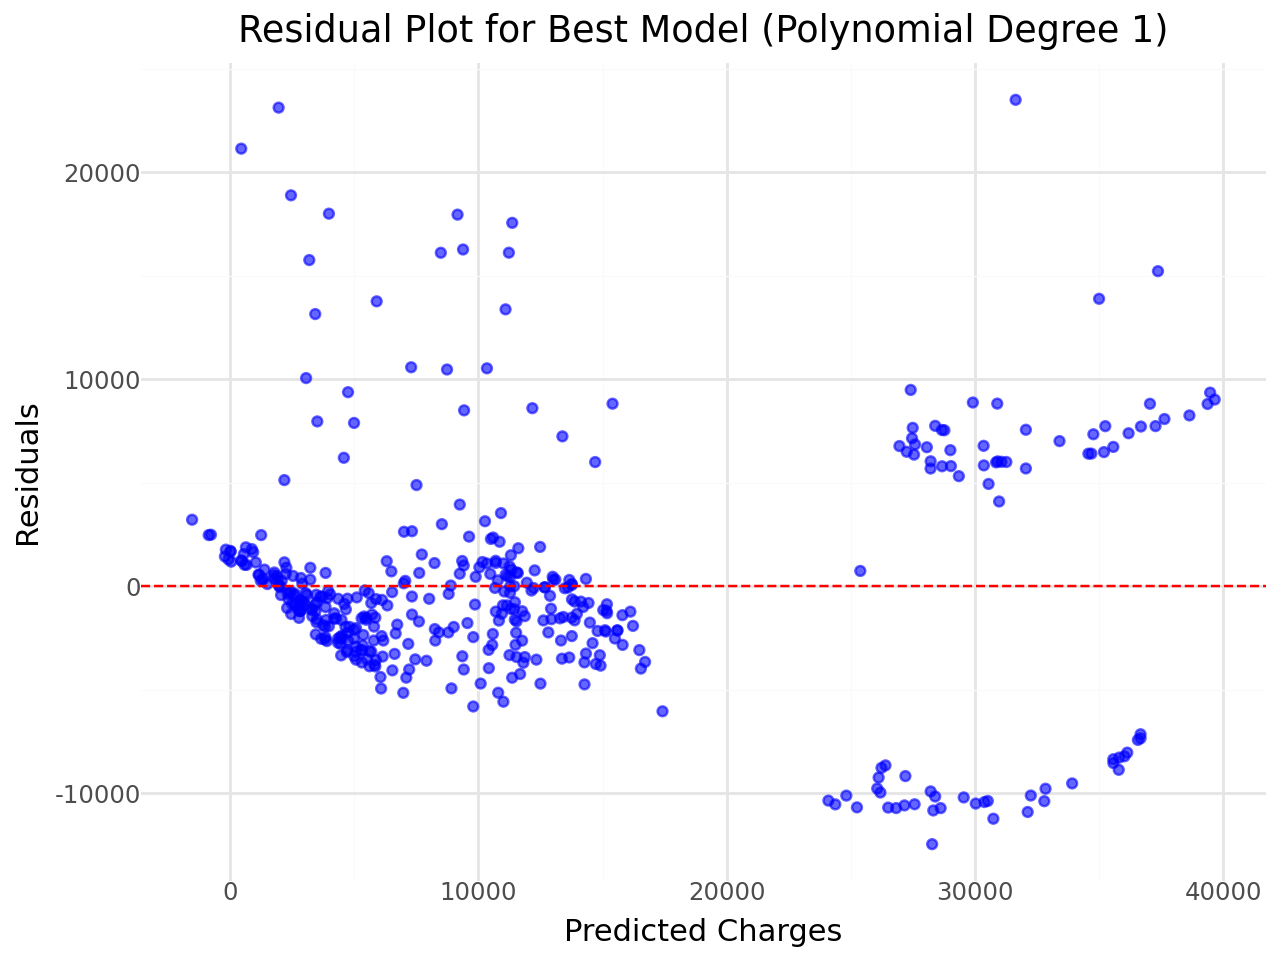

In [24]:
from plotnine import ggplot, aes, geom_point, geom_hline, labs, theme_minimal
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# Prepare polynomial features for degree 1 (linear terms only)
poly = PolynomialFeatures(degree=1, include_bias=False)
X_train_poly = poly.fit_transform(original_data[['age', 'bmi']])
X_train = np.hstack([X_train_poly, original_data[['smoker']].values])
y_train = original_data['charges']

# Fit the final chosen model (degree 1)
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the original data and calculate residuals
original_data['predicted_charges'] = model.predict(X_train)
original_data['residuals'] = original_data['charges'] - original_data['predicted_charges']

# Plot residuals
residual_plot = (
    ggplot(original_data, aes(x='predicted_charges', y='residuals')) +
    geom_point(alpha=0.6, color="blue") +
    geom_hline(yintercept=0, color="red", linetype="dashed") +
    labs(
        title="Residual Plot for Best Model (Polynomial Degree 1)",
        x="Predicted Charges",
        y="Residuals"
    ) +
    theme_minimal()
)

# Display the plot
residual_plot


Some answers assisted by ChatGPT